In [2]:
import pandas as pd
import time #to have today's date
timestr = time.strftime("%Y%m%d")
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
var_text_size = 15 #for font size in graphs



Bad key text.latex.preview in file c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\users\mann\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('save

In [3]:
var_time_a = '20220516'

In [4]:
df_country_topics_share = pd.read_csv('.//results//master_dfs//country_topics_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)
#so here we have 12 vectors (countries) with 22 dimensions (topics) 

In [5]:
df_country_categories_share = pd.read_csv('.//results//master_dfs//country_categories_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)
#so here we have 12 vectors (countries) with 22 dimensions (topics) 

In [6]:
# order of categories should be:
#    ['Energy governance & markets', 'Vested interests', 'Policies', 'Electric power system']

## for each country, do graph with the topics and the contribution, sorted by contribution


In [7]:
df_c = df_country_topics_share.set_index('Country')
df_c_T = df_c.copy().transpose().rename_axis('t_num', axis='columns')
#df_c_T.index.names=['t_num']

In [8]:
#change order according to results in p_18_TSNE & p_19_cluster
list_country_oder = ['DE', 'UK', 'CL', 'CO', 'US', 'KE', 'ZA', 'ID', 'IN', 'VN', 'PH', 'PK']
df_c_T_order = df_c_T[list_country_oder]

In [9]:
#I need one graph that constitutes the basis, 
#so it just has 100 for each country
df_100 = pd.DataFrame(columns=df_c_T_order.reset_index(drop=True).columns)
df_100.loc['100',:]= 100
df_100_T = df_100.transpose()

In [10]:
#create dict, each key is a country dataframe
dict_single_countries = {}
for x in df_c_T_order.columns:
    df_x = pd.DataFrame({'t_num':range(1, 23)})
    df_x['cont'] = df_c_T_order[x].values #only the respective country column
    df_x = df_x.sort_values('cont',ascending=False).reset_index(drop=True)
    dict_single_countries[x] = df_x

In [11]:
#group small topics into 'other'
dict_single_countries_other = {}
var_min_share = 3 #choose the percentage
for c in dict_single_countries:
    df_x = dict_single_countries[c]
    df_x_o = df_x.append({'t_num':'Other', 'cont':0}, ignore_index=True)
    idx_other = len(df_x_o)-1
    for x in range(0, len(df_x_o)-1):
        if df_x_o.loc[x, 'cont'] <=var_min_share:
            df_x_o.loc[idx_other, 'cont'] += df_x_o.loc[x, 'cont']
            df_x_o.drop(x, inplace=True)
    df_x_o.reset_index(drop=True, inplace=True)
    dict_single_countries_other[c] = df_x_o

In [12]:
#reverse df and get the cummulative percentage
dict_single_countries_other_cumsum = {}
for c in dict_single_countries_other:
    df_x = dict_single_countries_other[c]
    df_x_r = df_x #.iloc[::-1].reset_index(drop=True)
    df_x_r['cont_cum'] = 0
    df_x_r['cont_cum'] = df_x_r['cont'].cumsum()
    dict_single_countries_other_cumsum[c] = df_x_r

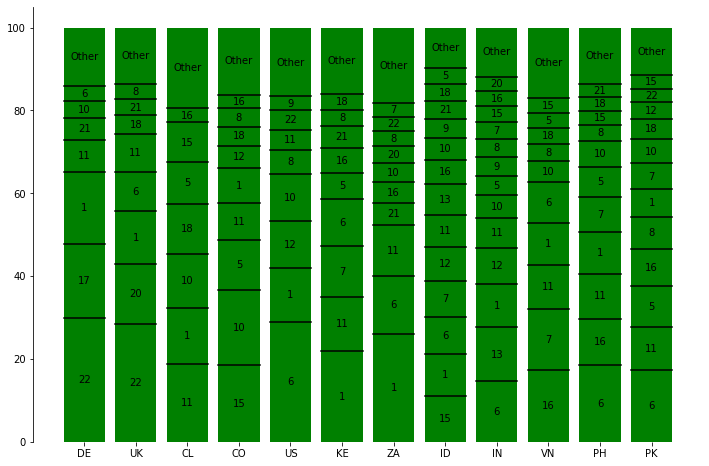

In [193]:
fig, ax1 = plt.subplots(figsize=(12,8))

#plot barplot
width = 0.8

ax1.bar(df_100_T.index, df_100_T['100'], width, \
        color='g')

#remove spines
for x in ['top', 'bottom', 'right']: #left
    ax1.spines[x].set_visible(False) 

    
#lines & topic numbers
n = 0
for c in dict_single_countries_other_cumsum.keys():
    df_x = dict_single_countries_other_cumsum[c]
    for z in df_x.index:
        #annotate the topic numbers
        ax1.annotate(df_x.loc[z, 't_num'], \
                     (n,((df_x.loc[z, 'cont_cum']))-(df_x.loc[z, 'cont']/2)) , \
                  fontsize=10,color='k', ha='center', va='center')# **hfont
        #make the lines
        if z != len(df_x)-1:
            ax1.plot((n-width/2,n+width/2), ((df_x.loc[z, 'cont_cum']),\
                                         (df_x.loc[z, 'cont_cum'])), color='k')
    n+=1
#show the topic number

plt.savefig('.//results//topics_bar_graphs//bars_order_'+str(var_min_share)+'%_'+timestr+'_V01.png', \
                   bbox_inches="tight") # , dpi=600
#plot graph
plt.show()

### Color of bars are categories

In [194]:
#color of each topic could be category! -->Nice!!
#if I only show the top x topics per country, I could stack x+1 bar plots
#for each plot, I can state a list of colors (according to category)

In [13]:
#group small topics into 'other'
var_only_show = 10 #before 8
dict_single_countries_other2 = {}
list_idx_to_other = range(var_only_show,22)
for c in dict_single_countries:
    df_x = dict_single_countries[c]
    df_x_o = df_x.append({'t_num':'Other', 'cont':0}, ignore_index=True)
    idx_other = len(df_x_o)-1
    for x in list_idx_to_other:
        df_x_o.loc[idx_other, 'cont'] += df_x_o.loc[x, 'cont']
        df_x_o.drop(x, inplace=True)
    df_x_o_r = df_x_o.iloc[::-1].reset_index(drop=True) #reverse, so 'other' is on top
    df_x_o_r.reset_index(drop=True, inplace=True)
    dict_single_countries_other2[c] = df_x_o_r

In [14]:
#reverse df and get the cummulative percentage
dict_single_countries_other2_cumsum = {}
for c in dict_single_countries_other2:
    df_x = dict_single_countries_other2[c]
    df_x_r = df_x#.iloc[::-1].reset_index(drop=True)
    df_x_r['cont_cum'] = 0
    df_x_r['cont_cum'] = df_x_r['cont'].cumsum()
    dict_single_countries_other2_cumsum[c] = df_x_r

In [15]:
df_topics_categories = pd.read_csv\
('.//results//master_dfs//category_numname_topics_numname_orinew_keywords_lambda_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)
#rename columns
df_t_c = df_topics_categories[['Topic_num', 'Category_label']].\
    rename(columns={'Topic_num':'t_num'})

In [16]:
df_cat_label_num = df_topics_categories[['Category_label', 'Category_num']].drop_duplicates().reset_index(drop=True)

'#117733' green; 
'#88CCEE' blue; 
'#DDCC77' yellow; 
'#CC6677' pink/red

In [17]:
#make dict with categories and colors
df_cat_label_num['hex'] = ['#117733', '#88CCEE', '#DDCC77', '#CC6677']
df_category_hex = df_cat_label_num.copy()

In [18]:
df_category_hex

,Category_label,Category_num,hex
0,Actors & interests,1,#117733
1,Electric power system,2,#88CCEE
2,Energy governance & markets,3,#DDCC77
3,Policies,4,#CC6677


In [19]:
#get the category for each topic
dict_single_countries_other2_cat = {}
for c in dict_single_countries_other2:
    df_x = dict_single_countries_other2[c]
    #merge to get category labels
    df_x_c = df_x.merge(df_t_c, how='left')
    #merge to get hex colors
    df_x_cc = df_x_c.merge(df_category_hex, how='left')
    #for 'other', choose light grey
    df_x_cc.hex.fillna('#e2e2e2', inplace=True) #, '#f9f9f9'
    dict_single_countries_other2_cat[c] = df_x_cc

In [20]:
dict_single_countries_other2_cat['DE']

,t_num,cont,cont_cum,Category_label,Category_num,hex
0,Other,7.9,7.9,NaN,NaN,#e2e2e2
1,5,1.8,9.7,Electric power system,2.0,#88CCEE
2,16,2.2,11.9,Energy governance & markets,3.0,#DDCC77
3,18,2.4,14.3,Policies,4.0,#CC6677
4,6,3.5,17.8,Electric power system,2.0,#88CCEE
5,10,4.2,22.0,Energy governance & markets,3.0,#DDCC77
6,21,5.2,27.2,Policies,4.0,#CC6677
7,11,7.7,34.9,Energy governance & markets,3.0,#DDCC77
8,1,17.4,52.3,Actors & interests,1.0,#117733
9,17,18.0,70.3,Policies,4.0,#CC6677


In [21]:
#make one df for the graph
df_graph_hex = pd.DataFrame()
for c in dict_single_countries_other2_cat:
    df_c = dict_single_countries_other2_cat[c]
    for x in df_c.index:
        df_graph_hex.loc[c, str(var_only_show-x)+'_%'] = df_c.loc[x, 'cont']
        df_graph_hex.loc[c, str(var_only_show-x)+'_#'] = df_c.loc[x, 'hex']

In [22]:
df_graph_hex

,10_%,10_#,9_%,9_#,8_%,8_#,7_%,7_#,6_%,6_#,...,4_%,4_#,3_%,3_#,2_%,2_#,1_%,1_#,0_%,0_#
DE,7.9,#e2e2e2,1.8,#88CCEE,2.2,#DDCC77,2.4,#CC6677,3.5,#88CCEE,...,5.2,#CC6677,7.7,#DDCC77,17.4,#117733,18.0,#CC6677,29.8,#CC6677
UK,9.3,#e2e2e2,2.1,#DDCC77,2.3,#CC6677,3.6,#88CCEE,3.9,#CC6677,...,9.3,#DDCC77,9.4,#88CCEE,12.8,#117733,14.5,#CC6677,28.4,#CC6677
CL,11.7,#e2e2e2,2.2,#CC6677,2.8,#88CCEE,2.9,#CC6677,3.4,#DDCC77,...,10.1,#88CCEE,12.0,#CC6677,13.1,#DDCC77,13.6,#117733,18.7,#DDCC77
CO,13.4,#e2e2e2,3.0,#CC6677,3.1,#DDCC77,4.5,#88CCEE,4.6,#CC6677,...,8.3,#117733,8.9,#DDCC77,12.1,#88CCEE,18.2,#DDCC77,18.5,#DDCC77
US,11.3,#e2e2e2,2.5,#88CCEE,2.6,#CC6677,3.4,#88CCEE,4.7,#CC6677,...,5.9,#88CCEE,11.2,#DDCC77,11.4,#DDCC77,13.1,#117733,28.9,#88CCEE
KE,13.7,#e2e2e2,2.5,#DDCC77,3.7,#CC6677,3.9,#88CCEE,5.4,#CC6677,...,6.2,#88CCEE,11.5,#88CCEE,12.2,#88CCEE,13.1,#DDCC77,21.9,#117733
ZA,18.3,#e2e2e2,3.2,#88CCEE,3.5,#CC6677,3.7,#88CCEE,4.0,#CC6677,...,5.1,#DDCC77,5.2,#CC6677,12.3,#DDCC77,14.1,#88CCEE,26.0,#117733
ID,22.0,#e2e2e2,4.6,#88CCEE,5.4,#DDCC77,5.8,#DDCC77,7.4,#DDCC77,...,8.2,#DDCC77,8.7,#88CCEE,8.8,#88CCEE,10.2,#117733,11.1,#DDCC77
IN,23.0,#e2e2e2,4.1,#88CCEE,4.4,#88CCEE,4.6,#88CCEE,4.6,#88CCEE,...,7.3,#DDCC77,8.8,#DDCC77,10.4,#117733,13.0,#DDCC77,14.6,#88CCEE
VN,17.1,#e2e2e2,3.6,#DDCC77,3.6,#88CCEE,3.9,#CC6677,4.0,#88CCEE,...,9.9,#88CCEE,10.1,#117733,10.7,#DDCC77,14.7,#88CCEE,17.3,#DDCC77


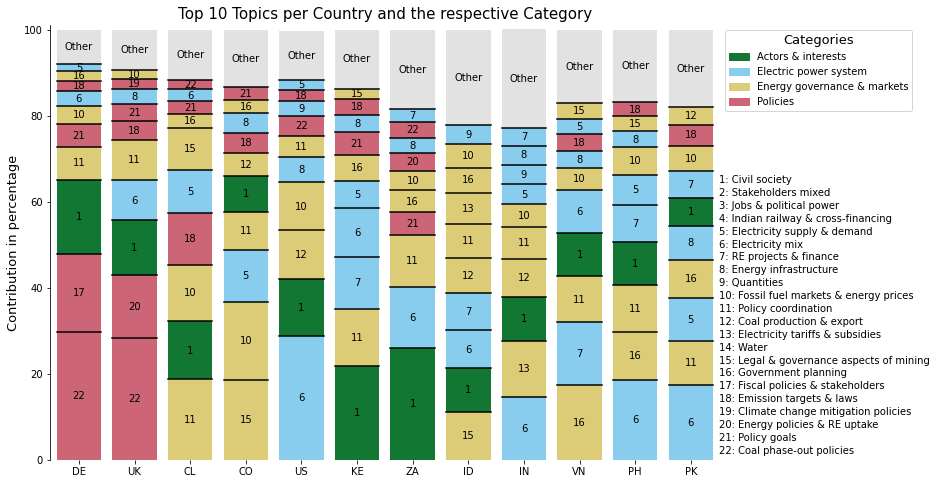

In [225]:
fig, ax1 = plt.subplots(figsize=(12,8))

#plot barplot
width = 0.8

list_bottom = [0] * 12
for n in range(0, var_only_show+1):
    ax1.bar(df_graph_hex.index, df_graph_hex[str(10-n)+'_%'], width, \
        color=df_graph_hex[str(10-n)+'_#'], bottom = list_bottom)
    list_bottom += df_graph_hex[str(10-n)+'_%']
 
#remove spines
for x in ['top', 'bottom', 'right']: #left
    ax1.spines[x].set_visible(False) 


#annotate lines & topic numbers
n = 0
for c in dict_single_countries_other2_cumsum.keys():
    df_x = dict_single_countries_other2_cumsum[c]
    for z in df_x.index:
        #annotate the topic numbers
        ax1.annotate(df_x.loc[z, 't_num'], \
                     (n,((df_x.loc[z, 'cont_cum']))-(df_x.loc[z, 'cont']/2)) , \
                  fontsize=var_text_size-5 ,color='k', ha='center', va='center')# **hfont
        #make the lines
        if z != len(df_x)-1:
            ax1.plot((n-width/2,n+width/2), ((df_x.loc[z, 'cont_cum']),\
                                         (df_x.loc[z, 'cont_cum'])), color='k')
    n+=1


    
#do customized legend showing the categories & colors
first_patch = mpatches.Patch(color=df_category_hex.loc[0, 'hex'], label=df_category_hex.loc[0, 'Category_label'])
second_patch = mpatches.Patch(color=df_category_hex.loc[1, 'hex'], label=df_category_hex.loc[1, 'Category_label'])
third_patch = mpatches.Patch(color=df_category_hex.loc[2, 'hex'], label=df_category_hex.loc[2, 'Category_label'])
fourth_patch = mpatches.Patch(color=df_category_hex.loc[3, 'hex'], label=df_category_hex.loc[3, 'Category_label'])

ax1.legend(handles=[first_patch, second_patch, third_patch, fourth_patch], bbox_to_anchor=(1, 1), loc='upper left', \
           title="Categories", title_fontsize=var_text_size-2)

#set title
ax1.set_title('Top '+str(var_only_show)+' Topics per Country and the respective Category', fontsize=var_text_size)

#set x-axis label
ax1.set_ylabel('Contribution in percentage', fontsize=var_text_size-2)

#set gap between y-axis and first bar
ax1.margins(0.01)

#annotate topics and their numbers
for x in df_topics_categories.index:
    var_num_an = df_topics_categories.loc[x, 'Topic_num']
    var_lb_an =  df_topics_categories.loc[x, 'Topic_label']
    ax1.annotate(str(var_num_an)+': '+var_lb_an, (11.5, 67-(var_num_an*3)), \
                 fontsize=var_text_size-5 ,color='k', ha='left', va='bottom') #

for y in ['png', 'svg']: 
    plt.savefig('.//results//topics_bar_graphs//bars_hex_order_'+str(var_only_show)+'_topics_'+timestr+'_V03.'+y, \
                   bbox_inches="tight") # , dpi=600
 
#plot graph
plt.show()

### show only categories

In [ ]:
## do Graph showing the 4 categories per country
#do a ax1.bar per category


In [23]:
#use category labels instead of category numbers
df_country_categories_share_labels = df_country_categories_share.copy()
df_country_categories_share_labels.rename(columns={'1':'Actors & interests', \
                                            '2':'Electric power system', \
                                           '3': 'Energy governance & markets', \
                                            '4': 'Policies'}, inplace=True)

In [24]:
#change order of countries, defined above!
list_country_oder

['DE', 'UK', 'CL', 'CO', 'US', 'KE', 'ZA', 'ID', 'IN', 'VN', 'PH', 'PK']

In [25]:
df_country_categories_share_order = df_country_categories_share_labels.set_index('Country')
df_country_categories_share_order = df_country_categories_share_order.loc[list_country_oder]
df_country_categories_share_order.reset_index(inplace=True)

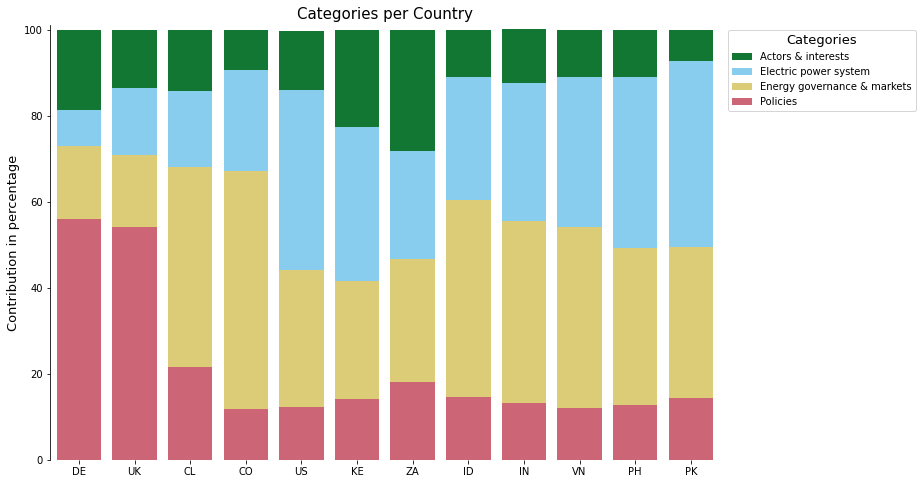

In [90]:
fig, ax1 = plt.subplots(figsize=(12,8))

#plot barplot
width = 0.8

list_bottom = [0] * 12
for cat in df_cat_label_num.sort_values('Category_num', ascending=False)['Category_label']: #do reverse, so the order is correct in the end (also in legend)
    var_color = df_category_hex[df_category_hex['Category_label']==cat]['hex']
    ax1.bar(df_country_categories_share_order['Country'], df_country_categories_share_order[cat], width, \
        color=var_color, bottom = list_bottom, label=cat)
    list_bottom += df_country_categories_share_order[cat]
 
#remove spines
for x in ['top', 'bottom', 'right']: #left
    ax1.spines[x].set_visible(False) 
    
#set title
ax1.set_title('Categories per Country', fontsize=var_text_size)

#set x-axis label
ax1.set_ylabel('Contribution in percentage', fontsize=var_text_size-2)

#set legend, reverse order
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.005, 1), loc='upper left', \
          title='Categories', title_fontsize=var_text_size-2)
           
#set gap between y-axis and first bar
ax1.margins(0.01)

for y in ['png', 'svg']: 
    plt.savefig('.//results//topics_bar_graphs//bars_categories_order_'+timestr+'_V02.'+y, \
                   bbox_inches="tight") # , dpi=600

#plot graph
plt.show()

### bar chart, sorted by category, show biggest topics

In [ ]:
#three or two biggest topics per country, rest 'other'
#do same graph as above, but annotate the topics!

In [ ]:
#per country and per category, get the biggest topics


In [26]:
#dict_single_countries : dict with dfs for each country showing the topics and their contribution
#add the categories to dict_single_countries
dict_count_t_cat = {}
for count in dict_single_countries:
    df_count = dict_single_countries[count]
    #merge to gtet category labels
    df_count_cat = df_count.merge(df_t_c, how='left')
    dict_count_t_cat[count] = df_count_cat

In [27]:
#per category, show only largest x topics, rest other
var_share_topics_keep = 3 #show only x topics


dict_top_t_cat = {}
for count in dict_count_t_cat: #for each country
    df_count_cat = dict_count_t_cat[count]
    df_top_t_cat = pd.DataFrame(columns=['t_num', 'cont', 'Category_label'])
    for cat in df_category_hex['Category_label']: #for each category
        df_short = df_count_cat[df_count_cat['Category_label'] == cat].reset_index(drop=True)
        df_short = df_short.append({'t_num':'other', 'cont':0, 'Category_label':cat}, ignore_index=True)
        idx_other = len(df_short)-1
        for x in range(0, len(df_short)-1): #'-1' so you don't drop 'other'
            if df_short.loc[x, 'cont'] <=var_share_topics_keep:
                df_short.loc[idx_other, 'cont'] += df_short.loc[x, 'cont']
                df_short.drop(x, inplace=True)
        df_short_r = df_short.iloc[::-1].reset_index(drop=True) #reverse, so 'other' is on top
        df_top_t_cat = df_top_t_cat.append(df_short_r, ignore_index = True)
    dict_top_t_cat[count] = df_top_t_cat

In [28]:
#reverse df and get the cummulative percentage
dict_top_t_cat_cumsum = {}
for c in dict_top_t_cat:
    df_x = dict_top_t_cat[c]
    df_x_r = df_x.iloc[::-1].reset_index(drop=True)
    df_x_r['cont_cum'] = 0
    df_x_r['cont_cum'] = df_x_r['cont'].cumsum()
    dict_top_t_cat_cumsum[c] = df_x_r

In [30]:
df_country_categories_share_order.to_csv('.//results//topics_bar_graphs//bars_categories_table_'+timestr+'_V01.csv',
    sep=';', decimal=',')

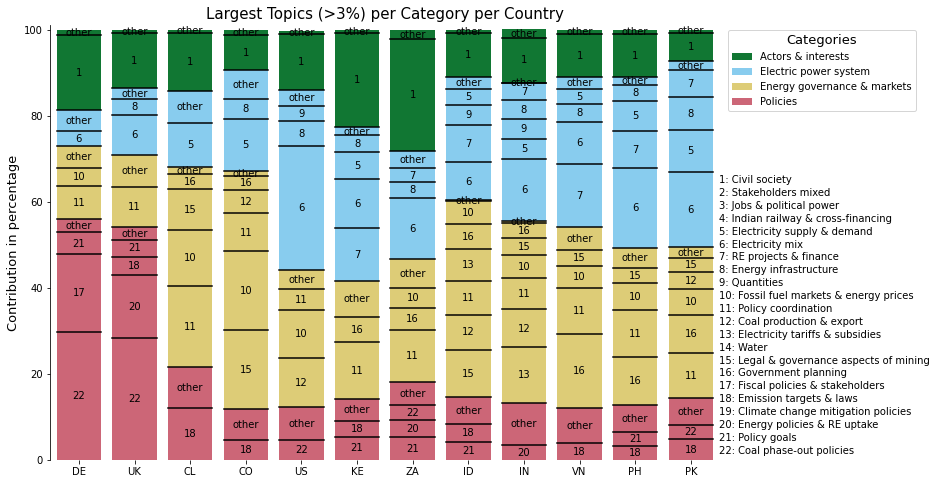

In [186]:
fig, ax1 = plt.subplots(figsize=(12,8))

#plot barplot
width = 0.8

list_bottom = [0] * 12
for cat in df_cat_label_num.sort_values('Category_num', ascending=False)['Category_label']: #do reverse, so the order is correct in the end (also in legend)
    var_color = df_category_hex[df_category_hex['Category_label']==cat]['hex']
    ax1.bar(df_country_categories_share_order['Country'], df_country_categories_share_order[cat], width, \
        color=var_color, bottom = list_bottom, label=cat)
    list_bottom += df_country_categories_share_order[cat]
 
#remove spines
for x in ['top', 'bottom', 'right']: #left
    ax1.spines[x].set_visible(False) 
    
#set title
ax1.set_title('Largest Topics (>'+str(var_share_topics_keep)+'%) per Category per Country', fontsize=var_text_size)

#set x-axis label
ax1.set_ylabel('Contribution in percentage', fontsize=var_text_size-2)

#set legend, reverse order
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.005, 1), loc='upper left', \
          title='Categories', title_fontsize=var_text_size-2)

#annotate lines & topic numbers
n = 0
for c in dict_top_t_cat_cumsum.keys():
    df_x = dict_top_t_cat_cumsum[c]
    for z in df_x.index:
        #annotate the topic numbers
        ax1.annotate(df_x.loc[z, 't_num'], \
                     (n,((df_x.loc[z, 'cont_cum']))-(df_x.loc[z, 'cont']/2)) , \
                  fontsize=var_text_size-5 ,color='k', ha='center', va='center')# **hfont
        #make the lines
        if z != len(df_x)-1:
            ax1.plot((n-width/2,n+width/2), ((df_x.loc[z, 'cont_cum']),\
                                         (df_x.loc[z, 'cont_cum'])), color='k')
    n+=1


#annotate topics and their numbers (as legend)
for x in df_topics_categories.index:
    var_num_an = df_topics_categories.loc[x, 'Topic_num']
    var_lb_an =  df_topics_categories.loc[x, 'Topic_label']
    ax1.annotate(str(var_num_an)+': '+var_lb_an, (11.5, 67-(var_num_an*3)), \
                 fontsize=var_text_size-5 ,color='k', ha='left', va='bottom') #

#set gap between y-axis and first bar
ax1.margins(0.01)

for y in ['png', 'svg']: 
    plt.savefig('.//results//topics_bar_graphs//bars_categories_'+str(var_share_topics_keep) +'%_topics_order_'+timestr+'_V02.'+y, \
                   bbox_inches="tight") # , dpi=600

#plot graph
plt.show()

In [61]:
#do table showing how often each topic can be seen in the graph

In [77]:
df_topics_count = df_topics_categories[['Topic_num', 'Topic_label', 'topic_score_%', 'Category_label']].copy()

In [78]:
df_topics_count['count_>3%'] = 0

In [79]:
for country in dict_top_t_cat_cumsum:
    df_count = dict_top_t_cat_cumsum[country]
    for n in range(1, 23):
        if n in list(df_count['t_num']):
            df_topics_count.loc[n-1, 'count_>3%'] += 1

In [80]:
df_topics_count.to_csv('.//results//topics_bar_graphs//table_topics_count_'+str(var_share_topics_keep) +'%.csv', 
                      sep=';', decimal=',')